In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# reset defalult plotting values
plt.rcParams['figure.figsize'] = (15, 5)
plt.rc('font', family='sans-serif')
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('axes', linewidth=2)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

# Telescopes
## the basics for observers

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/NewtonsTelescopeReplica.jpg/276px-NewtonsTelescopeReplica.jpg">

### Prof. Robert Quimby
&copy; 2020 Robert Quimby

## In this tutorial you will...

- Hear about the different types of telescopes available to astronomers
- Consider how telescope optics work to form images
- Learn about the most common configuration for modern research telescopes 

## Refracting Telescopes

<img src="https://www.dragonflytelescope.org/uploads/1/2/0/1/120152565/one-lens-0844-225_orig.jpg" width=350>

## Reflecting Telescopes

![reflecting telescope designs; figure taken from ????](media/telescopes.png)

## Magnification and Plate Scale

![](http://www.vikdhillon.staff.shef.ac.uk/teaching/phy217/telescopes/generic_telescope.gif)

* "Plate Scale" relates angular separation on the sky to linear separation on your detector (plate scale = $\theta / s$)

* $s/F = tan \theta \sim \theta$ (small angle approx.; $\theta$ in radians)

* conversion from radians to arcseconds
$$1 = {180 \, (\rm{deg}) \over \pi \, ({\rm rad})} \times {60 \, (\rm{arcmin}) \over 1 \, (\rm{deg})} \times {60 \, (\rm{arcsec}) \over 1 \, (\rm{arcmin})} \approx {206264 \, (\rm{arcsec}) \over 1 \,(\rm{rad})}$$

* so plate scale ~ 206264” / $F$ (plate scale is usually expressed in arcseconds per mm)

## Conic Sections

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Conic_Sections.svg/512px-Conic_Sections.svg.png)

$y^2 - 2Rx + (K + 1)x^2 = 0$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Conic_constant.svg/400px-Conic_constant.svg.png)

## Simple ray-tracing example

In [6]:
def get_x_intercept(K, R, y):
    coeff = [K + 1, -2 * R, y**2]
    xroots = np.roots(coeff)
    if K > 0:
        return xroots.min()
    else:
        return xroots.max()
    
def get_slope(K, R, y):
    x = get_x_intercept(K, R, y)
    if y > 0:
        sign = 1
    else:
        sign = -1
    if -1 < K <= 0:
        sign *= -1
    return sign * (R - (K + 1) * x) / np.sqrt(-x * (K * x - 2 * R + x))

# given an x value, find the y-value(s) (if any)
def find_xy_pairs(R, K, x):
    ysquared = 2 * R * x - (K + 1) * x**2
    w = ysquared >= 0
    y = np.sqrt(ysquared[w])
    xout = np.append(x[w][::-1], x[w])
    yout = np.append(-y[::-1], y)

    return xout, yout

In [4]:
def pick_color(value, vmin, vmax, cmap='viridis'):
    scaled = (value - vmin) / (vmax - vmin)
    mapping = plt.get_cmap(cmap)
    return mapping(scaled)

def plot_mirror(K=-1.0, R=1, xstart=10, slope=0, ymin=-2, ymax=2, nrays=20, incident=True, reflected=True):
    xt = np.linspace(0, 10, 10000)

    plt.figure(figsize=(15,10))
    plt.axes(aspect='equal')

    # plot the mirror
    xs, ys = find_xy_pairs(R, K, xt)
    plt.plot(xs, ys, label='K={}'.format(K), color='0.7', lw=5)

    # plot each ray
    for ystart in np.linspace(ymin, ymax, nrays):
        # find the x point in x where the ray hits the mirror
        coeff = [K + 1 + slope**2, 2 * (slope * ystart - R), ystart**2]
        xroots = np.roots(coeff)
        ind = np.argmin(np.abs(xroots))
        x = xroots[ind]

        # now find y
        y = slope * x + ystart

        # pick which color to use when plotting the ray
        color = pick_color(ystart, ymin, ymax)

        # find the slope of the mirror at the point of impact
        mirror_slope = get_slope(K, R, y)

        # find the slope of the reflected line
        reflected_slope = (mirror_slope**2 * slope + 2 * mirror_slope - slope) \
                           / (1 + 2 * mirror_slope * slope - mirror_slope**2)

        w = xt > x
        if incident:
            # plot the incident ray
            plt.plot(xt[w], xt[w] * slope + ystart, color=color, ls='dashed')#, zorder=1);

        if reflected:
            # plot the reflected ray
            y0_reflected = y - reflected_slope * x
            plt.plot(xt[w], xt[w] * reflected_slope + y0_reflected, color=color, ls='dotted')#, zorder=2);

    plt.axhline(0, c='k', lw=2, ls='dashed', label='Optical Axis')
    
    plt.grid()
    plt.legend(loc='upper left');

    plt.xlim(0, 7)
    plt.ylim(ymin - 1, ymax + 1);

(-1, 1)

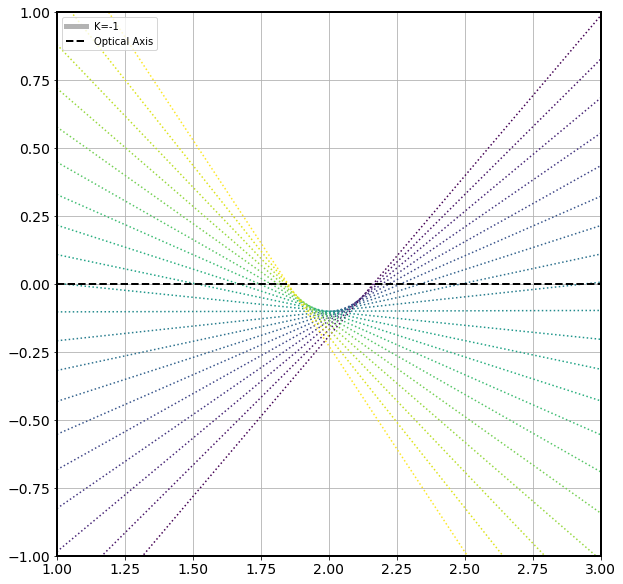

In [27]:
plot_mirror(K=-1, R=4, incident=False, reflected=True, slope=0.05)
plt.xlim(1, 3); plt.ylim(-1, 1)

## Ritchey–Chrétien Telescopes

![](https://upload.wikimedia.org/wikipedia/commons/c/cf/Ritchey-Chr%C3%A9tien.png)

### For an RC system:

$$K_1 = -1 - {2 \over M^3} {B \over D}$$
and
$$K_2 = -1 - {2 \over (M-1)^3} \left[M(2M - 1) + {B \over D} \right]$$

where $F$ is the focal length, $B$ is the back focal lenght, $D$ is the distance between the mirrors, and the secondary magnification is $M = (F - B) / D$.